In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
predictionFeature = 'SP.ADO.TFRT'
X = pd.read_csv("data/xSave.csv", index_col=0)
y = pd.read_csv("data/ySave.csv", index_col=0) #, usecols=['YEAR_5'])
columns=['CountryCode', 'IndicatorCode', 'Year', 'Value']
data = pd.read_csv("data/indicators.csv", usecols=(columns))
X.head()

,COUNTRY,YEAR,NY.GDP.MKTP.CD_0,NY.GDP.PCAP.CD_0,AG.PRD.CREL.MT_0,AG.YLD.CREL.KG_0,AG.PRD.CROP.XD_0,AG.PRD.FOOD.XD_0,AG.LND.CREL.HA_0,AG.PRD.LVSK.XD_0,...,SP.DYN.TFRT.IN_4,TX.VAL.MRCH.CD.WT_4,TX.VAL.MRCH.WL.CD_4,TX.VAL.MRCH.RS.ZS_4,TX.VAL.MRCH.HI.ZS_4,TM.VAL.MRCH.CD.WT_4,TM.VAL.MRCH.WL.CD_4,TM.VAL.MRCH.RS.ZS_4,TM.VAL.MRCH.HI.ZS_4,TG.VAL.TOTL.GD.ZS_4
0,AFG,1971,1.673333e+09,161.384702,3826000.0,1224.516,83.05,70.20,3124500.0,60.38,...,7.450,100000000.0,99900000.0,47.314314,42.712713,141000000.0,145386000.0,32.425405,57.253106,13.161423
1,AFG,1977,1.733333e+09,144.173944,4270000.0,1279.592,91.25,73.56,3337000.0,58.45,...,7.449,306000000.0,313137000.0,45.115397,35.590492,328000000.0,458652000.0,45.553055,45.343964,21.467268
2,AFG,1978,2.155555e+09,175.027098,4351000.0,1301.915,94.92,76.02,3342000.0,61.00,...,7.449,321000000.0,269156000.0,43.718141,27.069432,395000000.0,450516000.0,53.467801,34.542835,21.696969
3,AFG,1979,2.366667e+09,188.085136,4481000.0,1316.392,97.68,78.24,3404000.0,63.38,...,7.449,474000000.0,435015000.0,60.016551,18.152248,425000000.0,551216000.0,68.909647,24.561515,24.310830
4,AFG,1980,2.555556e+09,199.164809,4624000.0,1362.404,102.93,83.72,3394000.0,69.07,...,7.449,670000000.0,670474000.0,64.592065,19.471896,841000000.0,494754000.0,60.669343,32.162044,41.491344


In [49]:
y.head()

,YEAR_0,YEAR_1,YEAR_2,YEAR_3,YEAR_4
0,145.3210,146.2150,147.1090,148.0030,148.8970
1,150.8782,151.9654,153.0526,154.1398,155.2270
2,151.9654,153.0526,154.1398,155.2270,156.3758
3,153.0526,154.1398,155.2270,156.3758,157.5246
4,154.1398,155.2270,156.3758,157.5246,158.6734


In [50]:
# Can use OBSERVATION to get new y Data if we want to train on something else
pData = data[data.IndicatorCode == predictionFeature]
pData.head()

# If I do this I need to add some value to year and filter for things that dont have
# it (eg dont have 'SP.ADO.TFRT' 4 years from now, drop this observation)
# Also need to remove filtering code from other file
indices = [(pData.CountryCode == row[0]) & (pData.Year == int(row[1])) for row in X.values]
values = [pData[index].Value.values[0] for index in indices]
#y = pd.DataFrame(values, index=X.OBSERVATION.values, columns=['Value'])

In [51]:
from sklearn.cross_validation import train_test_split
X_data = X.drop(['COUNTRY', 'YEAR'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=0)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
train = y_train.YEAR_4 
test = y_test.YEAR_4

In [54]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, train)
#cv_scores = cross_val_score(clf, X_test, test, cv=4)
#cv_scores
clf.score(X_test, test)

0.99368182314774856

In [55]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train, train)
clf.score(X_test, test)

0.87752602923588452

In [56]:
#from sklearn.grid_search import GridSearchCV
#param_grid = [
#    {'C': [10], 'kernel': ['linear']},
#    {'C': [10], 'gamma': [0.03], 'kernel': ['rbf']},
#]
#clf = GridSearchCV(SVR(), param_grid, cv=4)
#clf = clf.fit(X_train, train)
#clf = clf.best_estimator_
#clf.score(X_test, test)

In [98]:
import seaborn as sb
import matplotlib.pyplot as plt
def getGraphData(clf, country):
    indices = (X.COUNTRY == country)
    realValues = y[indices].YEAR_4.values
    plotData = X[indices]
    
    dataPoints = []
    plotDataValues = plotData.drop(['COUNTRY', 'YEAR'], axis=1)
    predictions = clf.predict(plotData.drop(['COUNTRY', 'YEAR'], axis=1))
    for i in range(len(plotData.YEAR)):
        dataPoints.append([country + "_PREDICTED", plotData.YEAR.values[i], predictions[i], True])
        dataPoints.append([country + "_REAL", plotData.YEAR.values[i], realValues[i], False])
    return len(plotData.YEAR), dataPoints

def testClf(clf, countries):
    countryGraphData = []
    for country in countries:
        numYears, dataPoints = getGraphData(clf, country)
        countryGraphData.append(dataPoints)
    
    countryGraphDataFlattened = [item for sublist in countryGraphData for item in sublist]
    
    graphData = pd.DataFrame(countryGraphDataFlattened, columns=['COUNTRY', 'YEAR', 'VALUE', 'IS_PREDICTED'])
    
    numYears = len(countries)
    
    linestyles = ["--", "-"]*numYears
    markers= ["x", "o"]*numYears
    palette = np.repeat(sb.color_palette("Set1", n_colors=numYears, desat=.5), 2, axis=0)

    fig, (ax) = plt.subplots(1,1, figsize=(20,10))
    graph = sb.pointplot(x='YEAR', y='VALUE', hue='COUNTRY', linestyles=linestyles, markers=markers, palette=palette, data=graphData, ax=ax)

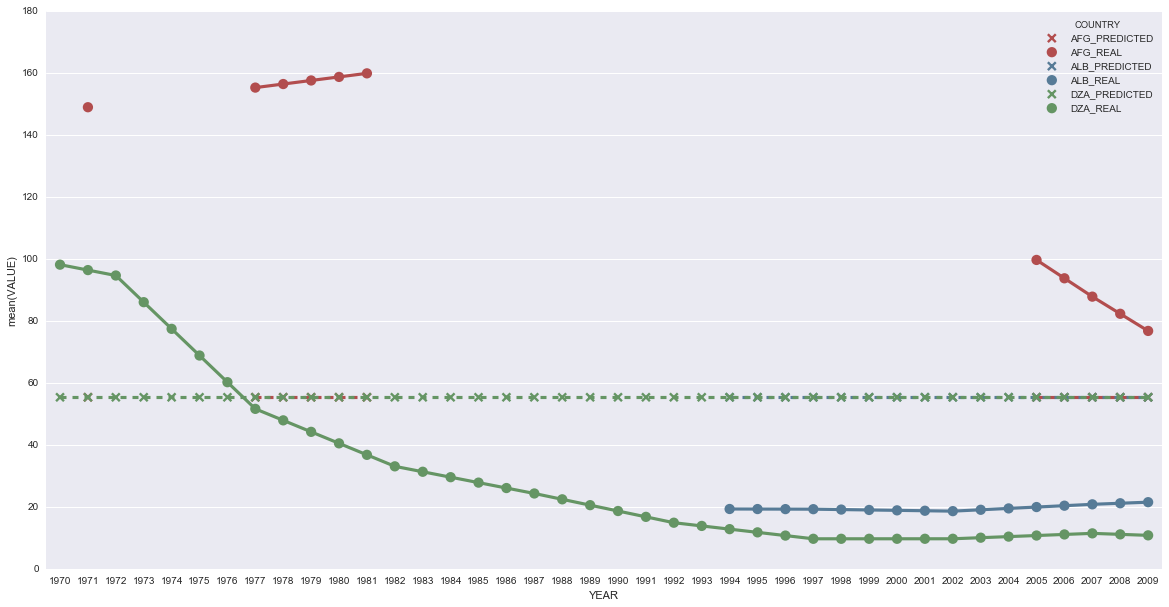

In [99]:
testClf(clf, ['AFG', 'ALB', 'DZA'])

In [108]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train, train.values)
clf.score(X_test, test.values)

0.87752602923588452

In [118]:
clf.predict(X_train[0:3])

array([ 116.4636408 ,   62.51772865,   75.49518014])

In [129]:
indices = (X.COUNTRY == 'DZA')
realValues = y[indices].YEAR_4.values
plotData = X[indices]
a = plotData.drop(['COUNTRY', 'YEAR'], axis=1).values
b = scaler.transform(a)


In [130]:
predictions = clf.predict(b)
predictions

array([ 131.26298715,  131.68755855,  130.17741541,  128.00724612,
        125.53326666,  122.00791213,  118.2380883 ,  115.63571096,
        110.68889965,  105.79091451,   99.36815021,   93.43884599,
         86.44934482,   80.6170445 ,   73.62614238,   68.40174676,
         62.80191495,   57.88850598,   54.13911791,   51.29415513,
         48.17765146,   45.84131108,   43.87990091,   41.80740946,
         39.72558182,   37.84283003,   35.79940372,   33.68453316,
         31.69654312,   29.91918168,   28.58516108,   27.23020086,
         26.19842111,   25.48947918,   25.18841748,   25.05355408,
         25.20766161,   25.27646506,   25.19584243,   25.5893767 ])

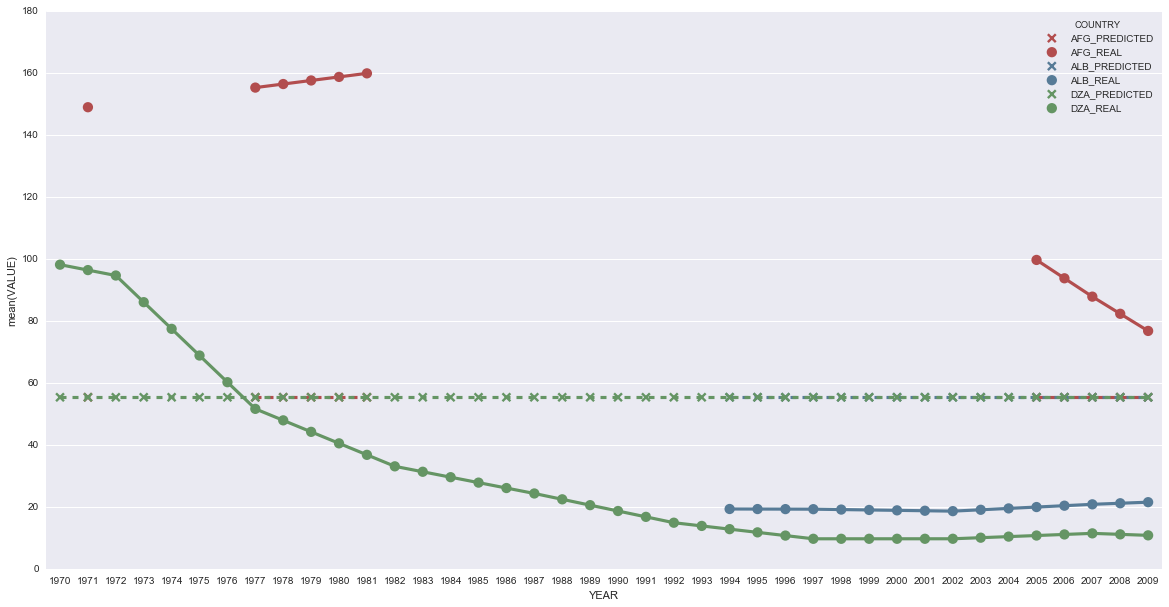

In [109]:
testClf(clf, ['AFG', 'ALB', 'DZA'])